### Exploratory data analysis

### GRN Learn

1. check if TFs in a module are correlated : 

1.1. e.g. genes in an operon
1.2. genes in a module SoxR and SoxS
1.3. SoxR and OxyR 
1.4. Make a generalizable function to get any pair of genes, or go further
1.5. Make a generalizable function to get a Gridmap plot of any four or five genes: check what's the limit. 

2. Make umap of the whole dataset 
2.0.1 Make clustering in the expression dataset and see if the clusters are similar to what we get from the network.

Rant: Say I have a set of labels corresponding to the clusters of the trn. 

What’s the mutual information of the label set with itself. 

What’s the mutual information of the label set changing cluster numbers say 1 for 2 and 2 for 

What’s the variation of information in both of these cases.

Then ask: given a dataset, say Weissman Or TnSeq ir Colombos with the first two PCs/UMAPs: which clustering algorithm gives the best score ? 

2.1 Make UMAP of only the TRN
2.2 Make supervised umap of the TRN w/ 
2.3 Make semisupervised UMAP of all of the genes. 

2.4 Re apply the clustering ? 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random 
import matplotlib as mpl
#import sort_seq as ss
#from sort_seq import *

from keras.backend import clear_session
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.utils import np_utils
from keras.metrics import categorical_accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.layers import Dropout
import keras.backend
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile,\
mutual_info_classif, chi2, f_classif

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#ss.set_plotting_style_2()
np.random.seed(42)


%matplotlib inline
%config InlineBackend.figure_format = 'png'

Using TensorFlow backend.


In [1]:
path = '~/jupyter-notebooks/rpgroup/data/ml_dfs/'

In [4]:
regulons_with_noise = pd.read_csv(path + 'ecoli_ml.csv', index_col = 0)

In [5]:
regulons_with_noise.head()

,locustag,gene name,geneid/contrast_id,reconstructed dimension 1,reconstructed dimension 2,reconstructed dimension 3,reconstructed dimension 4,reconstructed dimension 5,reconstructed dimension 6,reconstructed dimension 7,...,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10
16,b0019,nhaa,18,0.230012,-0.332532,-0.296651,-0.161845,-0.647282,-0.621831,0.282383,...,0,1,0,0,0,0,0,0,0,0
17,b0020,nhar,19,0.380282,-0.441964,-0.219085,-0.487243,-0.892474,-0.405036,0.454539,...,0,1,0,0,0,0,0,0,0,0
28,b0031,dapb,30,-0.572378,0.384431,-0.595088,-0.044283,-1.294017,-2.045967,0.430921,...,1,0,0,0,0,0,0,0,0,0
29,b0032,cara,31,2.349211,0.270211,0.214264,0.308618,-0.130808,-0.418779,1.922151,...,0,1,0,1,0,0,0,0,0,0
30,b0033,carb,32,1.150417,0.292297,0.164520,0.475078,0.007902,-0.134054,1.331079,...,0,1,0,1,0,0,0,0,0,0


In [14]:
lacz = regulons_with_noise[regulons_with_noise['gene name'] == 'lacz']

laca = regulons_with_noise[regulons_with_noise['gene name'] == 'laca']

In [24]:
lacz_data = lacz.iloc[:, 3:].values.T
laca_data = laca.iloc[:, 3:].values.T

In [25]:
lacz_data.shape
laca_data.shape

(4088, 1)

(4088, 1)

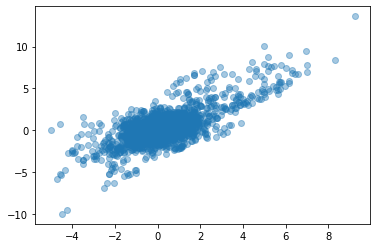

In [29]:
plt.scatter(laca_data, lacz_data, alpha = 0.4);